## Plot all detected pairwise interactions found by UCB algorithm

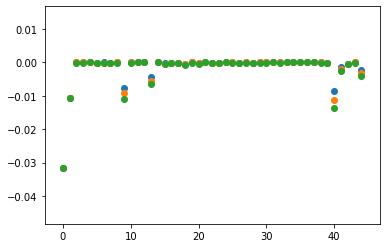

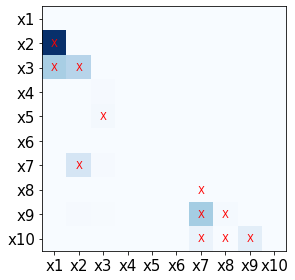

0.9438502673796791
0.9438502673796791


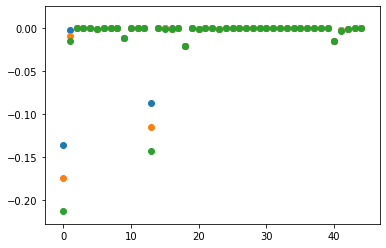

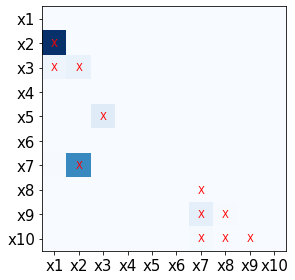

0.8957219251336898
0.8957219251336898


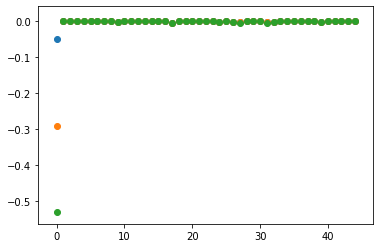

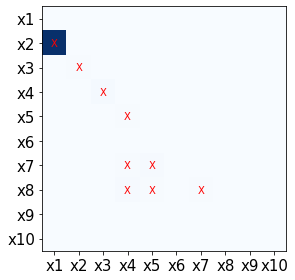

1.0
1.0


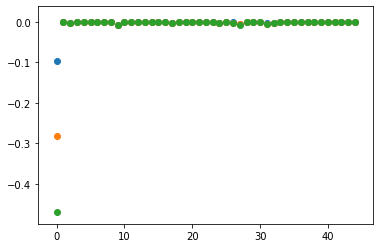

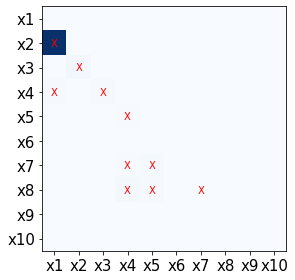

0.9628571428571429
0.9628571428571429


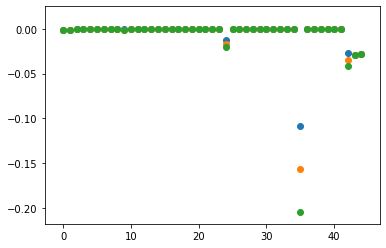

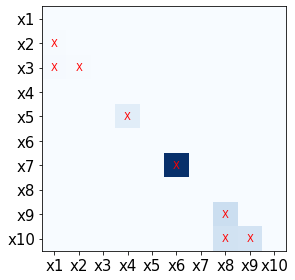

1.0
1.0


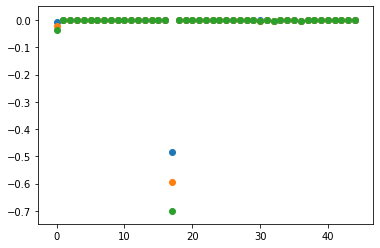

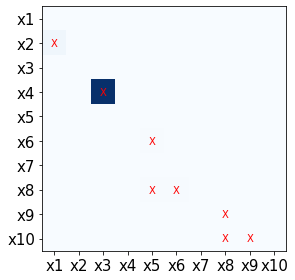

0.9256756756756757
0.9256756756756757


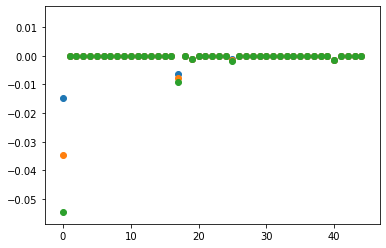

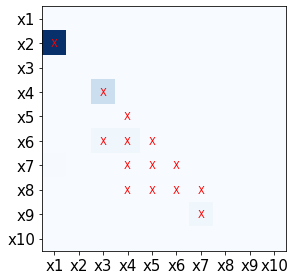

0.7073732718894009
0.7073732718894009


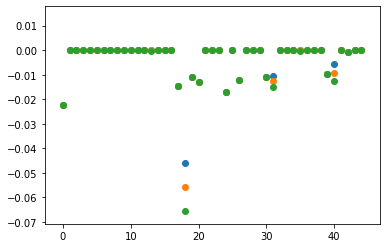

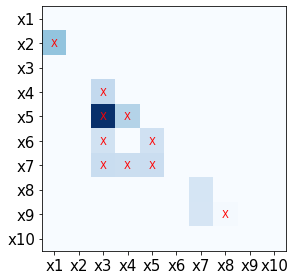

0.9942857142857142
0.9942857142857142


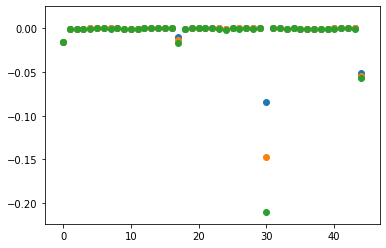

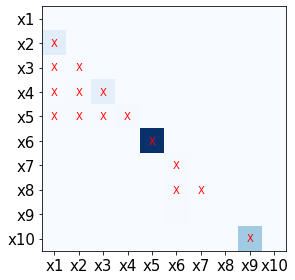

0.9733333333333334
0.9733333333333334


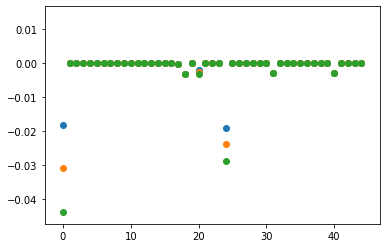

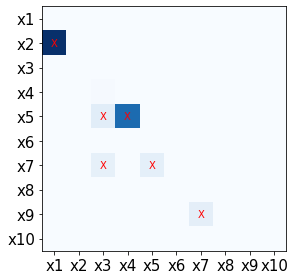

1.0
1.0


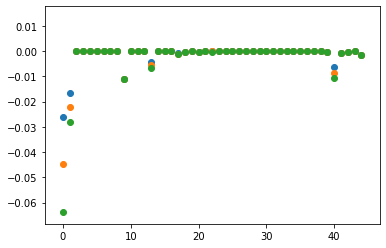

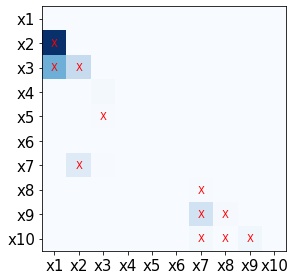

0.9679144385026739
0.9679144385026739


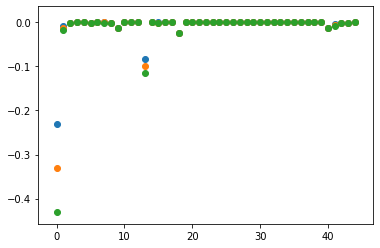

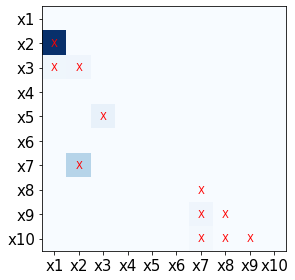

0.9117647058823529
0.9117647058823529


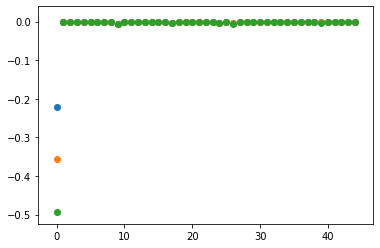

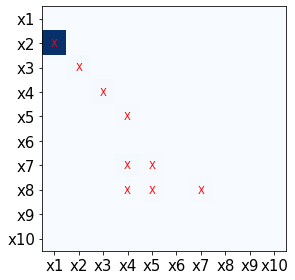

1.0
1.0


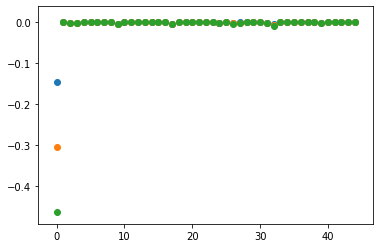

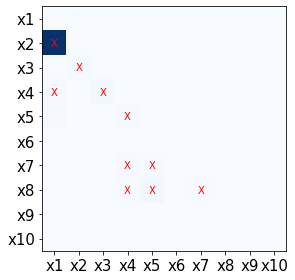

0.9828571428571429
0.9828571428571429


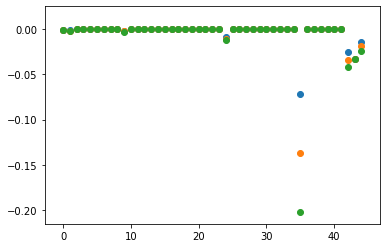

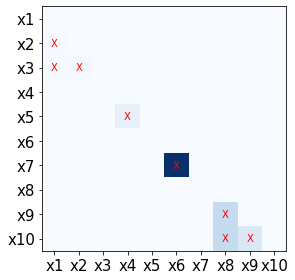

1.0
1.0


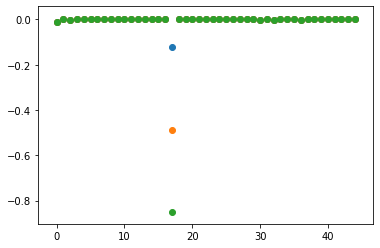

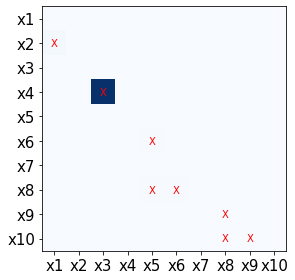

0.9459459459459458
0.9459459459459458


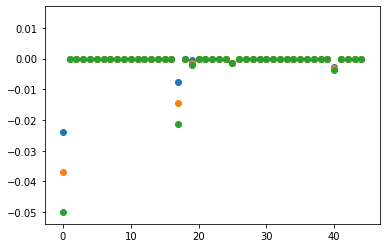

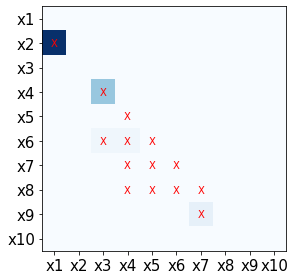

0.5829493087557603
0.5829493087557603


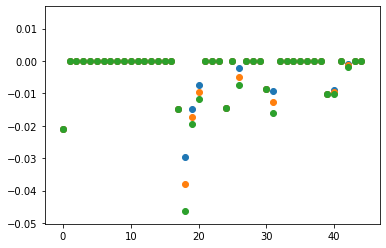

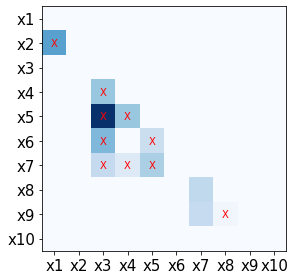

0.98
0.98


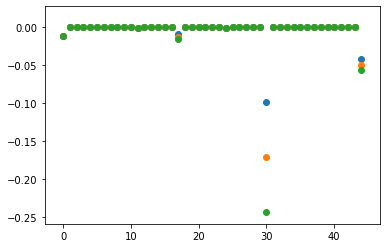

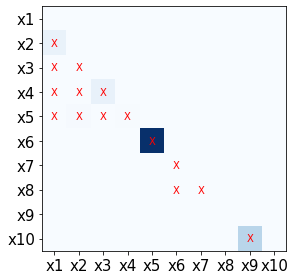

0.9911111111111112
0.9911111111111112


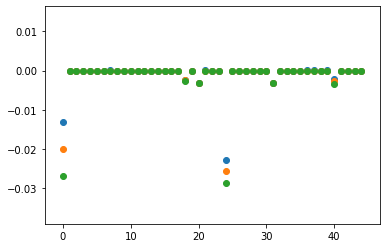

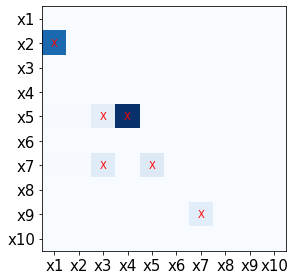

1.0
1.0


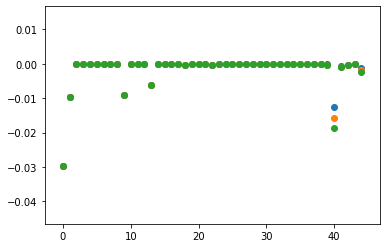

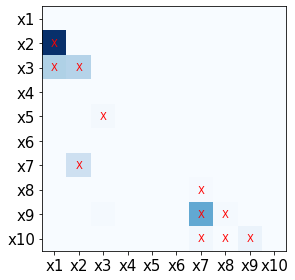

0.9224598930481283
0.9224598930481283


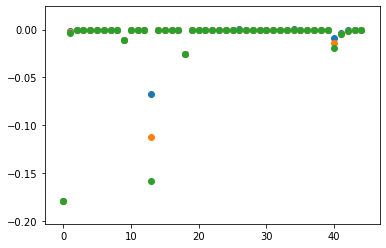

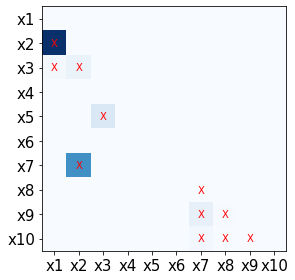

0.9331550802139037
0.9331550802139037


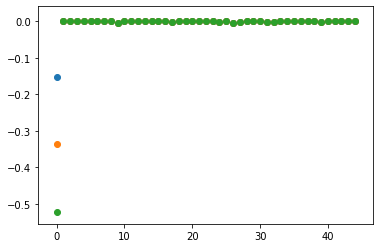

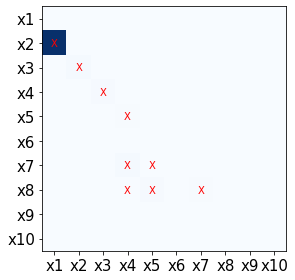

1.0
1.0


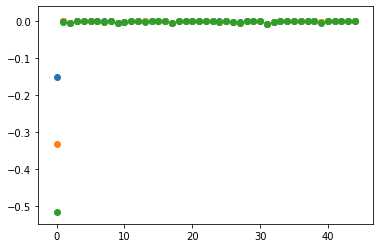

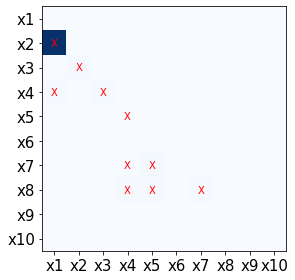

0.9942857142857142
0.9942857142857142


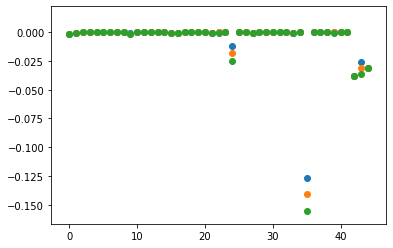

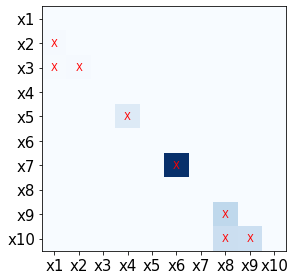

1.0
1.0


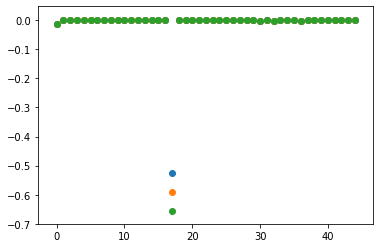

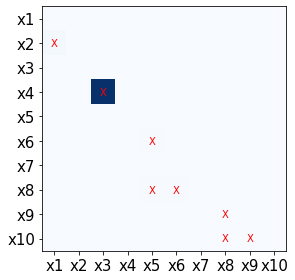

0.9256756756756757
0.9256756756756757


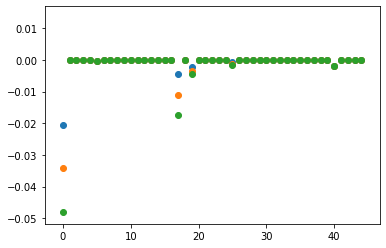

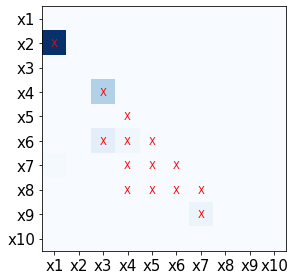

0.7695852534562212
0.7695852534562212


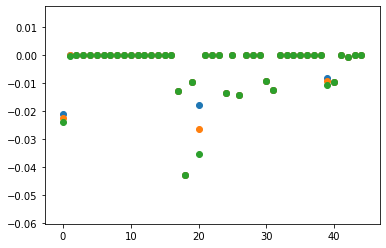

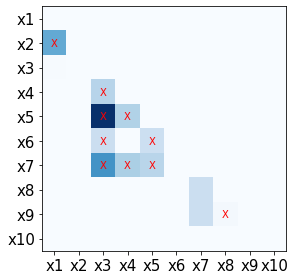

0.9885714285714285
0.9885714285714285


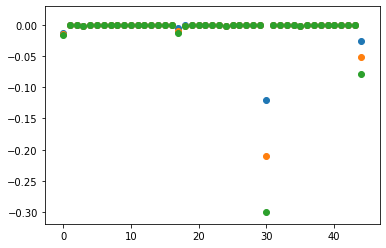

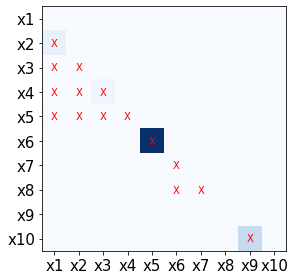

0.9933333333333333
0.9933333333333333


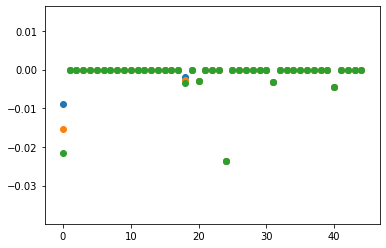

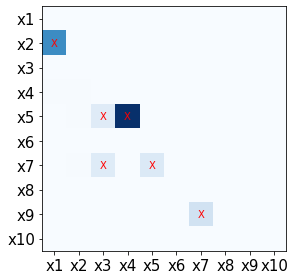

1.0
1.0


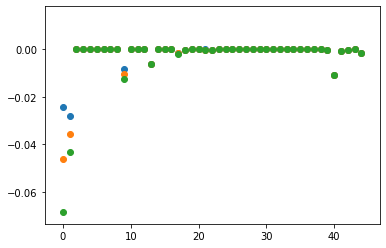

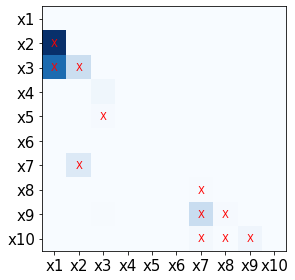

0.9705882352941178
0.9705882352941178


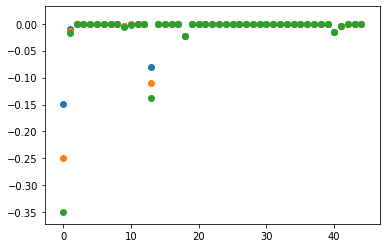

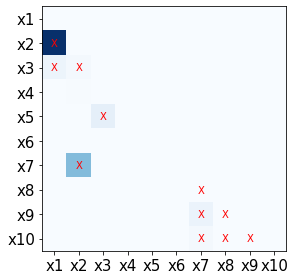

0.9144385026737967
0.9144385026737967


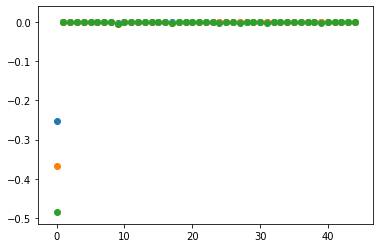

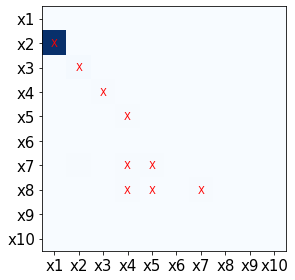

0.9969135802469136
0.9969135802469136


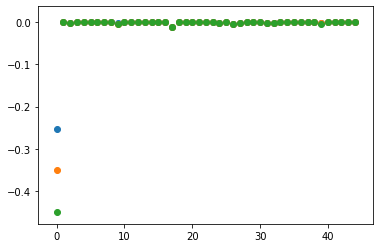

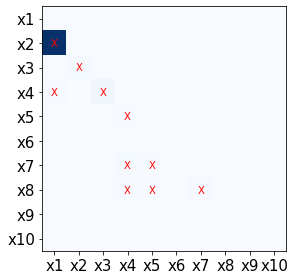

1.0
1.0


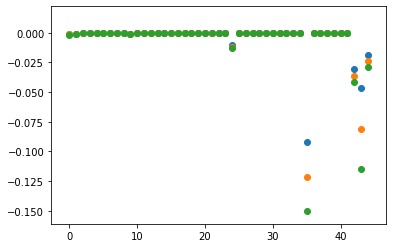

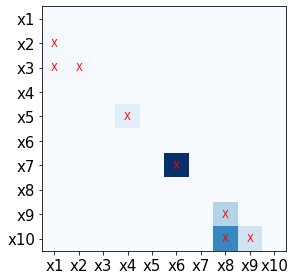

1.0
1.0


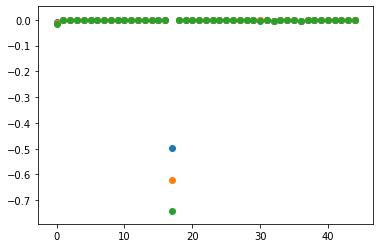

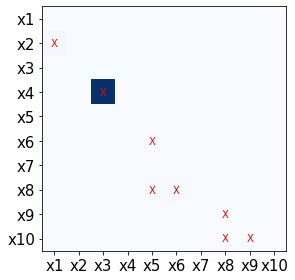

0.9121621621621623
0.9121621621621623


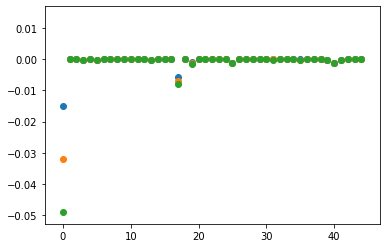

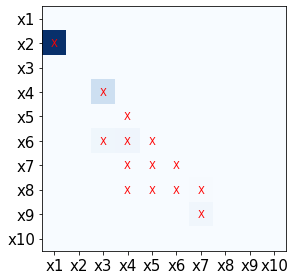

0.728110599078341
0.728110599078341


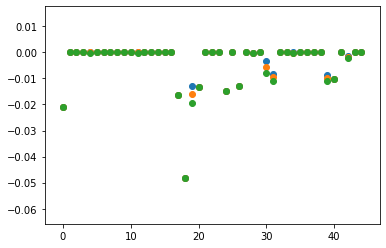

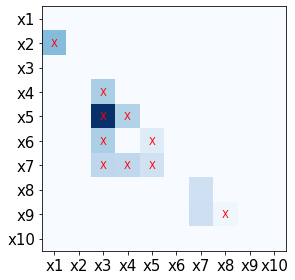

0.9828571428571429
0.9828571428571429


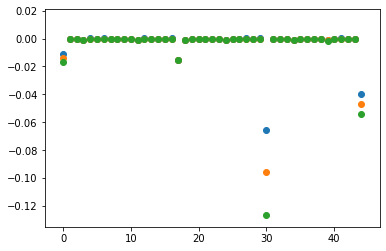

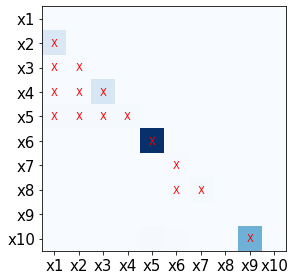

0.9088888888888889
0.9088888888888889


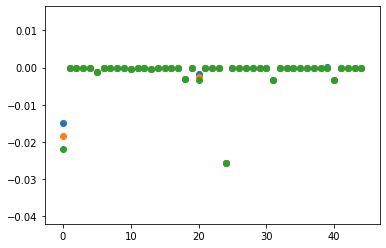

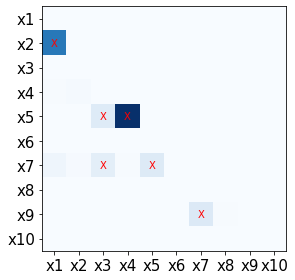

1.0
1.0


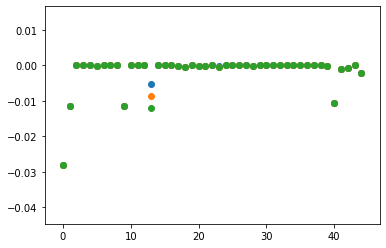

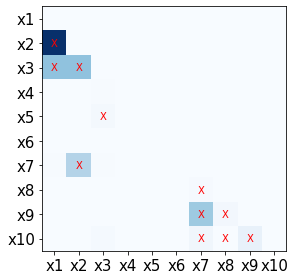

0.981283422459893
0.981283422459893


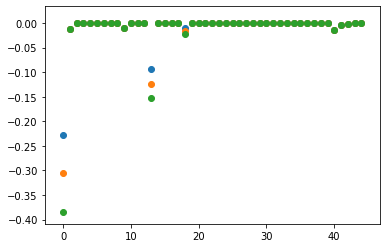

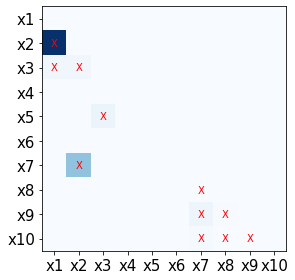

0.9304812834224598
0.9304812834224598


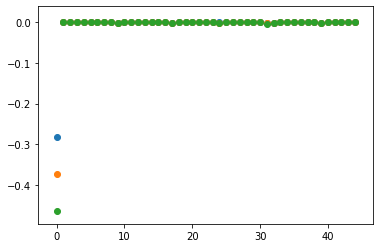

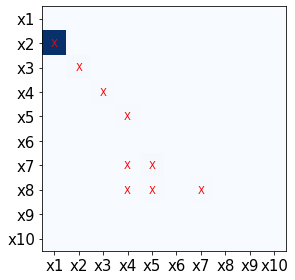

0.9475308641975309
0.9475308641975309


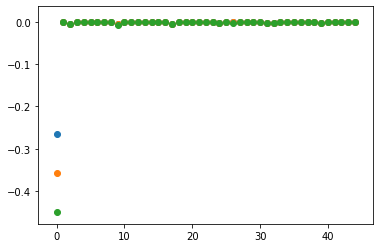

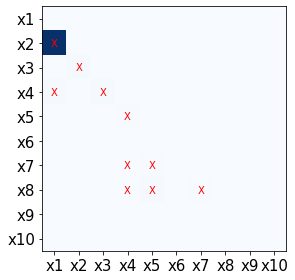

0.9257142857142857
0.9257142857142857


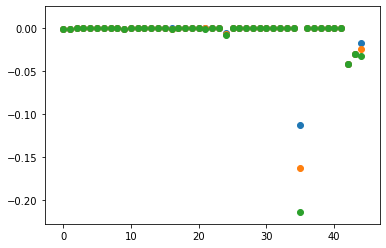

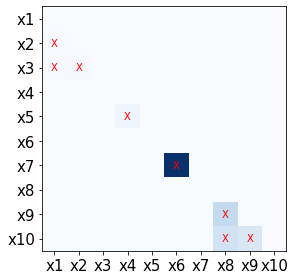

1.0
1.0


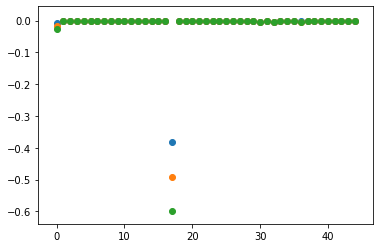

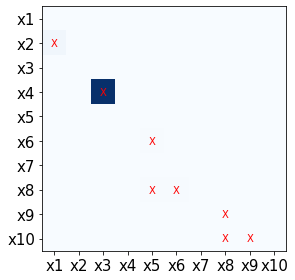

0.8952702702702703
0.8952702702702703


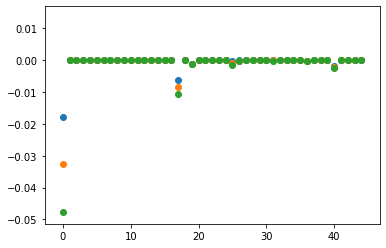

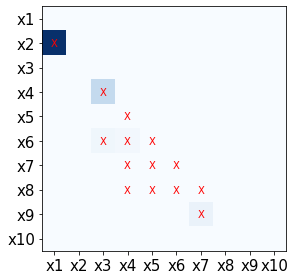

0.7142857142857143
0.7142857142857143


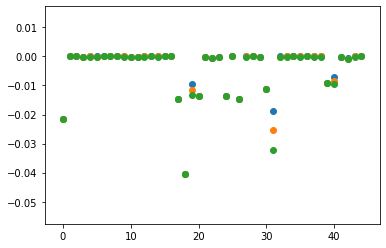

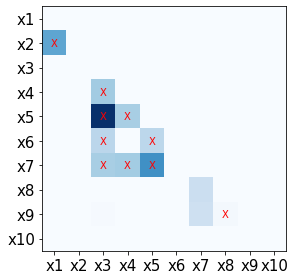

0.9942857142857142
0.9942857142857142


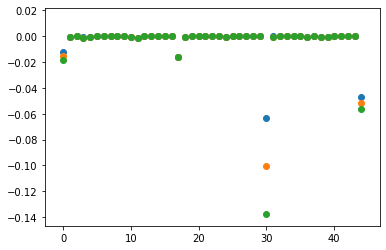

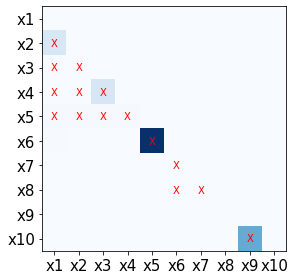

0.8555555555555557
0.8555555555555557


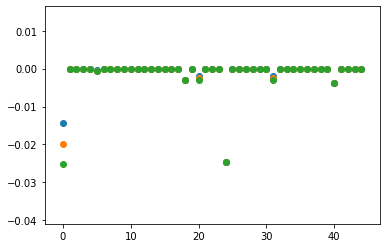

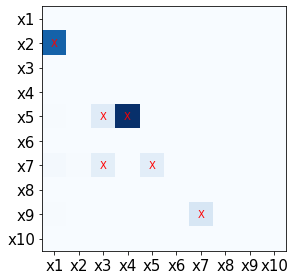

1.0
1.0


In [1]:
import pickle
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline  
import os
directorys=['syn_plot_figures']  # temp models
for directory in directorys:
    if not os.path.exists(directory):
        os.makedirs(directory)

def softmax(a,T):
    return np.exp(a/T)/sum(np.exp(a/T))        
        
aucs=[]
p=10
# gound_truth_tsang
ground_truth_dict={}
ground_truth_dict['0']=[(0,1),(1,2),(0,2),(2,4),(6,7),(6,8),(6,9),(7,8),(7,9),(8,9),(1,6)]
ground_truth_dict['1']=[(0,1),(1,2),(0,2),(2,4),(6,7),(6,8),(6,9),(7,8),(7,9),(8,9),(1,6)]
ground_truth_dict['2']=[(0,1),(1,2),(2,3),(3,4),(3,6),(4,6),(3,7),(4,7),(6,7)]
ground_truth_dict['3']=[(0,1),(1,2),(2,3),(3,4),(3,6),(4,6),(3,7),(4,7),(6,7),(0,3)]
ground_truth_dict['4']=[(0,1),(0,2),(1,2),(3,4),(5,6),(7,8),(7,9),(8,9)]
ground_truth_dict['5']=[(0,1),(2,3),(4,5),(4,7),(5,7),(7,8),(7,9),(8,9)]
ground_truth_dict['6']=[(0,1),(2,3),(3,4),(2,5),(3,5),(4,5),(3,6),(4,6),(5,6),(3,7),(4,7),(5,7),(6,7),(6,8)]
ground_truth_dict['7']=[(0,1),(2,3),(2,4),(3,4),(2,5),(4,5),(2,6),(3,6),(4,6),(7,8)]
ground_truth_dict['8']=[(0,1),(0,2),(1,2),(0,3),(1,3),(2,3),(0,4),(1,4),(2,4),(3,4),(4,5),(5,6),(5,7),(6,7),(8,9)]
ground_truth_dict['9']=[(0,1),(2,4),(3,4),(2,6),(4,6),(6,8)]

featurename=['x'+str(x+1) for x in range(18)]
for seed in range(5):
    for datasetindex in range(10):
        fr = open('UCB/'+str(datasetindex)+'.csv'+str(seed)+'UCB.txt','rb')
        summary=(pickle.load(fr))
        fr.close()
        plt.scatter(range(len(summary['ucb'])),summary['ucb'])
        plt.scatter(range(len(summary['ucb'])),summary['estimate'])
        plt.scatter(range(len(summary['ucb'])),summary['lcb'])

        Larms=[]
        for i in itertools.combinations(range(10),2):
            Larms.append(i)

        # print top k arms,(index start from 0)
        #for i in np.argpartition(summary['ucb'], range(15))[:15]:
        #    print(Larms[i],summary['ucb'][i])

        Hessian=np.zeros([p,p])
        
        #softmax estimate
        estimate=np.abs(summary['estimate'])
        #estimate=softmax(estimate,0.01)
        
        for i in range(len(Larms)):
            Hessian[Larms[i][0],Larms[i][1]]=estimate[i]
        Hessian=Hessian.T
        fig, ax = plt.subplots()
        im = ax.imshow(Hessian,cmap=plt.cm.Blues)

        # We want to show all ticks...
        ax.set_xticks(np.arange(10))
        ax.set_yticks(np.arange(10))
        # ... and label them with the respective list entries
        ax.set_xticklabels(featurename,fontsize=15)
        ax.set_yticklabels(featurename,fontsize=15)

        # Rotate the tick labels and set their alignment.
        #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        #         rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for k in ground_truth_dict[str(datasetindex)]:
            i,j=k[1],k[0]
            text = ax.text(j, i, 'X',
                            ha="center", va="center", color="r")

        #ax.set_title("Harvest of local farmers (in tons/year)")
        fig.tight_layout()
        fig.savefig('syn_plot_figures/syntheticF'+str(datasetindex+1)+'_seed_'+str(seed)+'.pdf',bbox_inches='tight',dpi=fig.dpi,pad_inches=0.1)
        plt.show()



        ground_vec=np.zeros(45)
        for i in range(45):
            if Larms[i] in ground_truth_dict[str(datasetindex)]:
                ground_vec[i]=1

        rank=np.concatenate([np.abs(summary['estimate']).reshape(45,1),ground_vec.reshape(45,1)],axis=1)
        rank = rank[np.argsort(-rank[:,0])]

        #rank[:,0]=-np.array(range(45))

        fpr, tpr, thresholds = metrics.roc_curve(rank[:,1], rank[:,0], pos_label=1)
        print(roc_auc_score(ground_vec,np.abs(summary['estimate'])))
        print(metrics.auc(fpr, tpr))
        aucs.append(metrics.auc(fpr, tpr))

## Average AUC value

In [2]:
auctable=np.array(aucs).reshape(5,10).T
print('std',np.std(auctable,axis=1))
print('mean',np.mean(auctable,axis=1))
print('average','mean',np.mean(auctable),np.std(np.mean(auctable,axis=0)))

std [0.02125626 0.01363374 0.02071353 0.02689966 0.         0.01676983
 0.06259483 0.00582745 0.05397759 0.        ]
mean [0.95721925 0.9171123  0.98888889 0.97314286 1.         0.92094595
 0.70046083 0.988      0.94444444 1.        ]
average mean 0.9390214516717363 0.00910864826331776
